In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

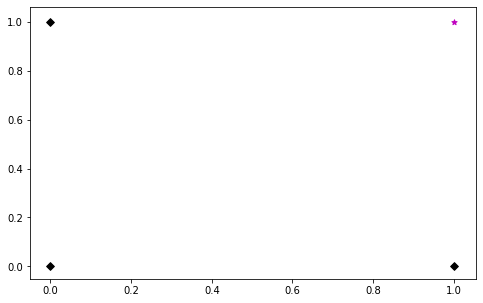

In [94]:
data=pd.DataFrame({
    'X2':[0,0,1,1],
    'X1':[0,1,0,1],
    'y':[0,0,0,1]
})
data.insert(0,'ones',1)
X=data.iloc[:,:3]
y=data.iloc[:,3:]
pos=data[data['y']==1]
neg=data[data['y']==0]
fig,axs=plt.subplots(figsize=(8,5))
axs.scatter(pos['X1'],pos['X2'],c='m',s=30,marker='*')
axs.scatter(neg['X1'],neg['X2'],c='k',s=30,marker='D')
plt.show()

In [95]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [96]:
def cal_cost(X,y,weights):
    h=sigmoid(X*weights.T)
    m=len(X)
    return (-(np.sum(np.multiply(y,np.log(h))+np.multiply(1-y,np.log(1-h))))/m)
    

In [97]:
X=np.matrix(X)
y=np.matrix(y)
weights=np.matrix(np.array([0,0,0]))

In [98]:
def Gradient_descent(X,y,weights,alpha,iters):
    temp=np.matrix(np.zeros(weights.shape))
    para=int(weights.ravel().shape[1])
    cost=np.zeros(iters)
    m=len(X)
    for i in range(iters):
        error=sigmoid(X*weights.T)-y
        for j in range(para):
            temp1=np.multiply(error,X[:,j])
            temp[0,j]=weights[0,j]-(alpha/m)*np.sum(temp1)
        weights=temp
        cost[i]=cal_cost(X,y,weights)
    return weights,cost

0.006929131958502826


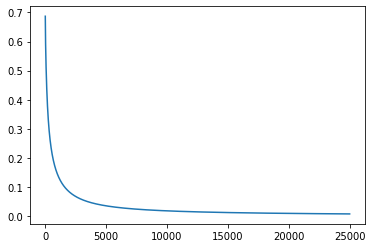

In [99]:
n=25000
alpha=0.1
a=np.arange(n)
final_weights,final_cost=Gradient_descent(X,y,weights,alpha,n)
print(final_cost[-1])
plt.plot(a,final_cost)
plt.show()

In [111]:
def predict(X,weights):
    prob=sigmoid(X*weights.T)
    return [1 if temp>=0.5 else 0 for temp in prob]
new_x=pd.DataFrame({
    'ones':[1,1,1,1],
    'X1':[0.9,0.1,0.1,0.7],
    'X2':[0.1,0.1,0.9,0.99]
})
new_x=np.matrix(new_x)

y_predicted=predict(new_x,final_weights)
print(y_predicted)
print(final_weights)

[0, 0, 0, 1]
[[-14.07866318   9.27248349   9.27248349]]


In [101]:
y_predicted=predict(X,final_weights)
corr = [1 if (p==1 and q==1)or(p==0 and q==0) else 0 for (p,q) in zip(y_predicted,y)]
if all(corr):
    print(1)
else:
    accuracy=(sum(map(int,corr))%len(corr))
    print(accuracy)
print(y_predicted,y)

1
[0, 0, 0, 1] [[0]
 [0]
 [0]
 [1]]
